In [1]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from src.paths import processed_data_path,repo_path

In [2]:
cfm_data_path = f'{repo_path}SpinUp_Sensitivity_Example/CFMinput_example/'
ds_path = f"{processed_data_path}stations_ds.nc"
ds = xr.open_dataset(ds_path)
stations = ds.station.data
variables = list(ds.keys())

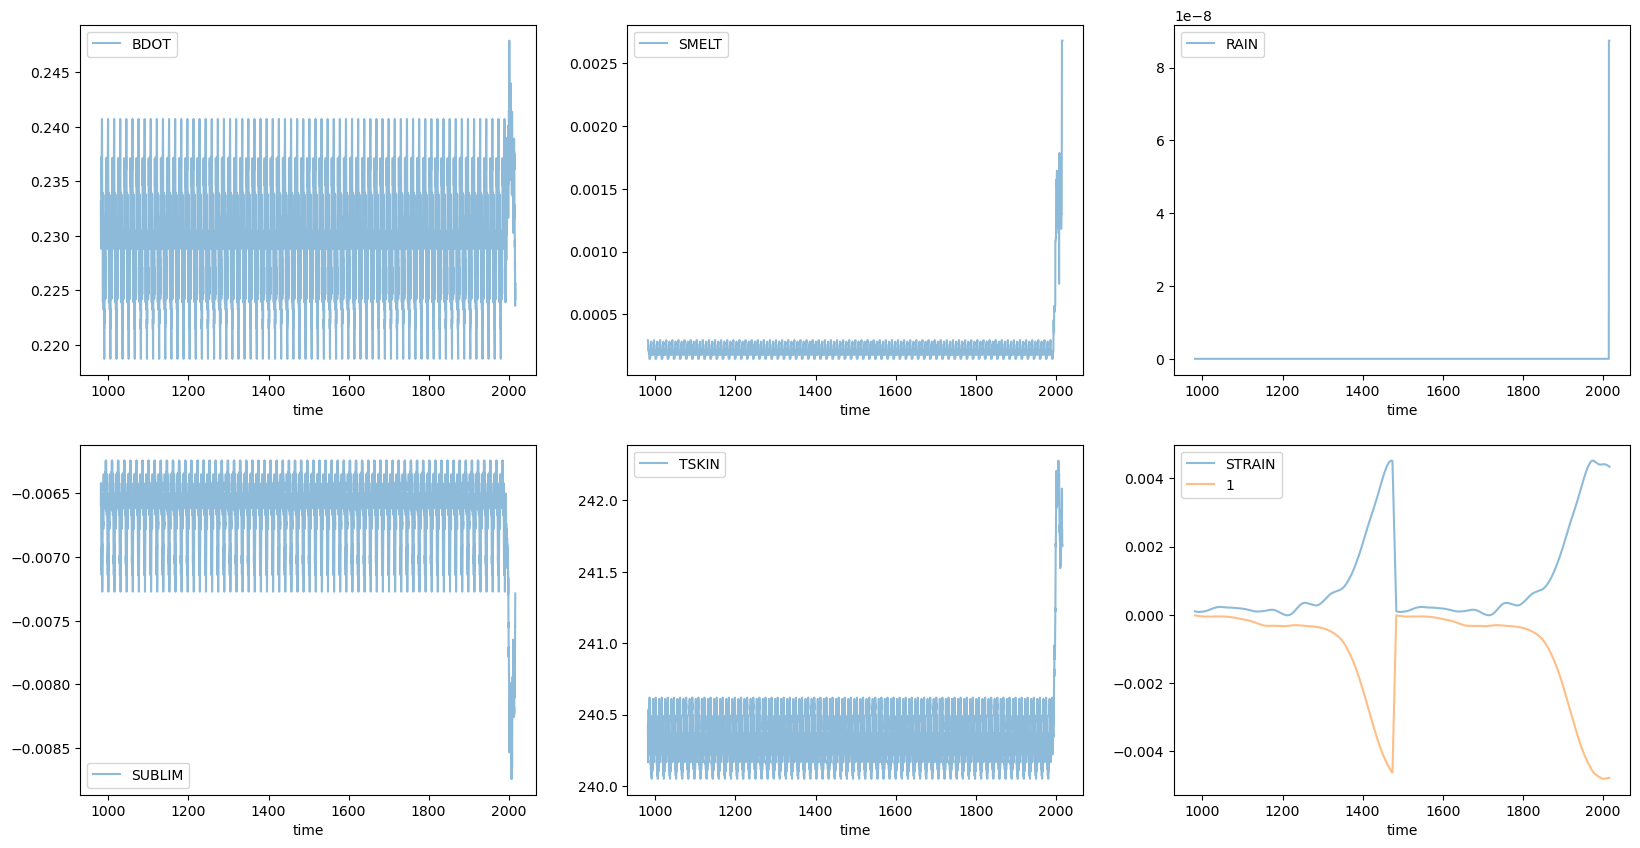

In [3]:
fig, subplots = plt.subplots(2, 3,figsize=(20,10))
variables = ['BDOT','SMELT','RAIN','SUBLIM','TSKIN','STRAIN']
for ax,variable in zip(subplots.flat,variables):
    df = pd.read_csv(f'{cfm_data_path}extended_{variable}.csv').T
    df = df.reset_index()
    df.rename(columns = {"index":"time",0:f"{variable}"}, inplace = True)
    df = df.apply(pd.to_numeric) 
    df_smoothed = df.rolling(window=12*10).mean()
    df_smoothed.plot(x='time',ax=ax,label=f'{variable}',alpha=0.5)